In [52]:
import pandas as pd
import numpy as np
import statistics

In [53]:

with open('mountains_db.tsv', encoding='utf-8') as f:
    lines = f.readlines()

names = []
altitudes = []
taras = []
codisos = []

for line in lines:
    parts = line.strip().split('\t')
    if len(parts) == 4:
        names.append(parts[0])
        altitudes.append(parts[1])
        taras.append(parts[2])
        codisos.append(parts[3])

df = pd.DataFrame({
    'name': names,
    'altitude': altitudes,
    'tara': taras,
    'codiso': codisos
})

df.to_csv('mountains_db.csv', index=False)
df.head()
print(f"nrtari {len(np.array(df['tara'].unique()))}")


nrtari 258


In [54]:
nullvals=df[df["altitude"]=="NULL"]
notnullvals=df[df["altitude"]!="NULL"]

print(len(np.array(notnullvals["altitude"])))


print(F"NULL values {len(np.array(nullvals))}")
# Convert altitude to numeric, ignoring 'NULL'
notnullvals['altitude'] = pd.to_numeric(notnullvals['altitude'])

min_val = notnullvals["altitude"].min()
max_val = notnullvals["altitude"].max()
standarddev = notnullvals["altitude"].std()
median_val = notnullvals['altitude'].median()
mean_val = notnullvals["altitude"].mean()

print(min_val)
print(max_val)
print(median_val)
print(mean_val)
print(standarddev)



53152
NULL values 84586
0.0
8172.0
984.0
1286.2325302904874
1109.2874014093054


C:\Users\andre\AppData\Local\Temp\ipykernel_19972\3505277386.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notnullvals['altitude'] = pd.to_numeric(notnullvals['altitude'])


In [55]:
topN = int(input("cei mai inalti munti"))
mountainssorted = []
for idx, row in notnullvals.iterrows():
    mountainssorted.append({"name": row['name'], "altitudey": row['altitude']})
mountainssorted.sort(key=lambda x: x["altitudey"], reverse=True)
for i in range(topN):
    print(mountainssorted[i])

{'name': 'Dhaulagiri', 'altitudey': 8172.0}
{'name': 'Manaslu', 'altitudey': 8163.0}
{'name': 'Nanga Parbat', 'altitudey': 8125.0}
{'name': 'Annapurna', 'altitudey': 8091.0}
{'name': 'Xixabangma Peak', 'altitudey': 8012.0}
{'name': 'Kanchenjunga Mountain', 'altitudey': 8000.0}
{'name': 'Nanga Mountain', 'altitudey': 8000.0}
{'name': 'Nuptse', 'altitudey': 7879.0}
{'name': 'Masherbrum', 'altitudey': 7821.0}
{'name': 'Nanda Devi', 'altitudey': 7817.0}
{'name': 'Rakaposhi', 'altitudey': 7788.0}
{'name': 'Rakaposhi Mountain', 'altitudey': 7788.0}
{'name': 'Disteghil', 'altitudey': 7785.0}
{'name': 'Masherbrum Mountain', 'altitudey': 7784.0}
{'name': 'Namcha Barwa', 'altitudey': 7782.0}
{'name': 'Saltoro Kangri Mountain', 'altitudey': 7742.0}
{'name': 'Trivor Mountain', 'altitudey': 7728.0}
{'name': 'Jannu', 'altitudey': 7710.0}
{'name': 'Tirich Mir', 'altitudey': 7708.0}
{'name': 'Gangkhar Puensum', 'altitudey': 7570.0}
{'name': 'Mount Gongga', 'altitudey': 7556.0}
{'name': 'Muztagata', 'a

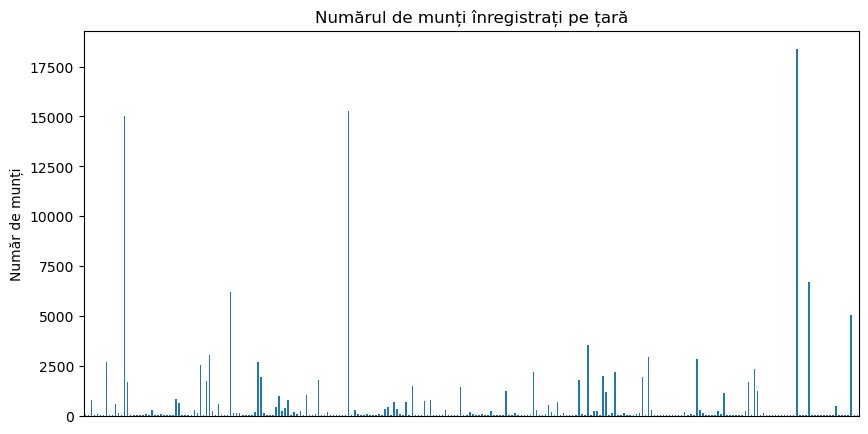

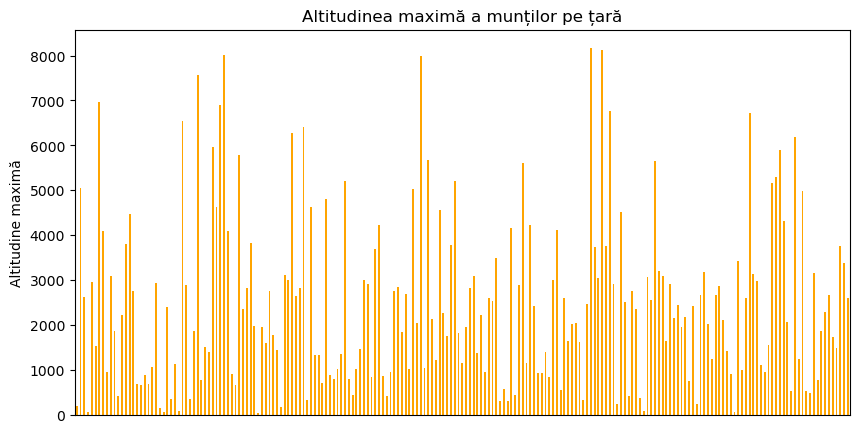

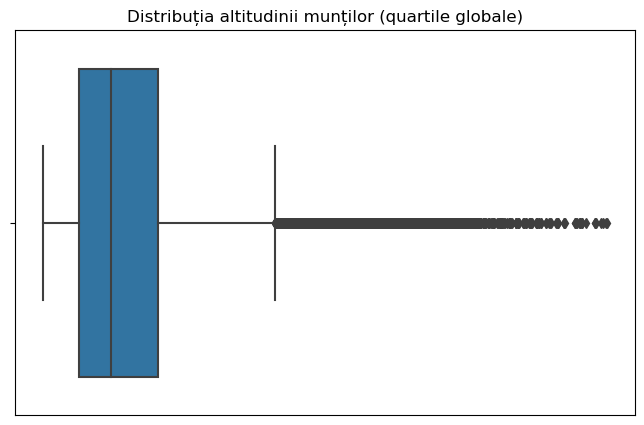

<Figure size 1400x600 with 0 Axes>

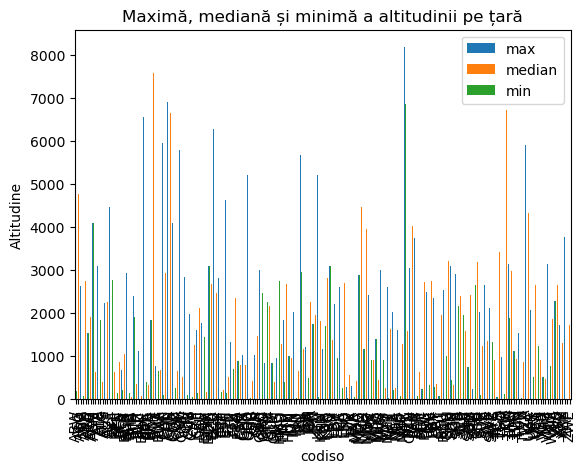

Text(0.5, 1.0, 'Distribuția altitudinii (boxplot) pe țară')

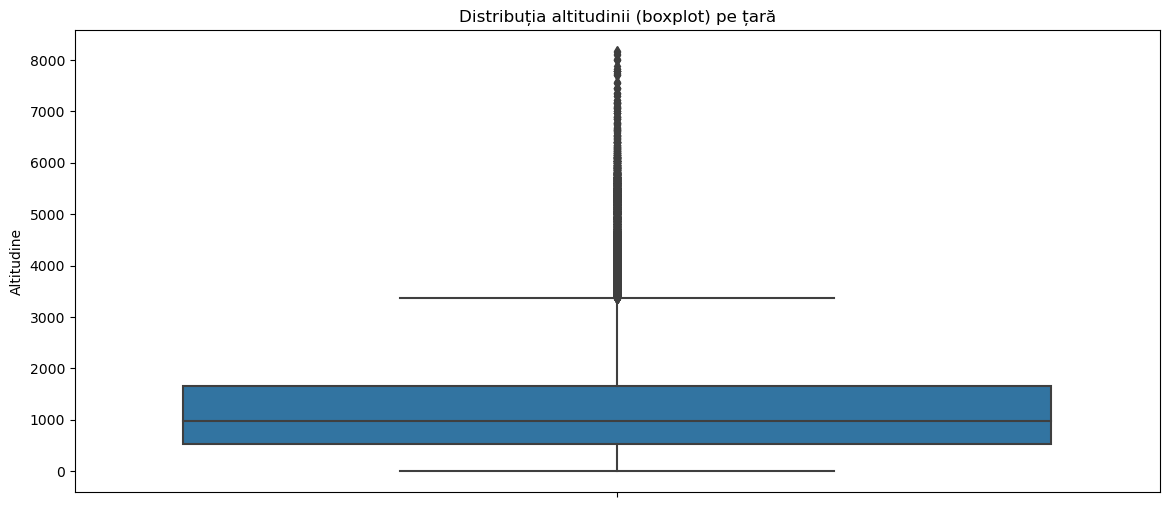

In [ ]:
#plots
import matplotlib.pyplot as plt
import seaborn as sns

# 5. Bar chart: cod ISO vs număr de munți
plt.figure(figsize=(10,5))
country_counts = df.groupby('codiso')['name'].count()
country_counts.plot(kind='bar')
#plt.xlabel('Țară (cod ISO)')
plt.ylabel('Număr de munți')
plt.gca().axes.get_xaxis().set_visible(False)
plt.title('Numărul de munți înregistrați pe țară')
plt.show()

# 6. Bar chart: cod ISO vs altitudine maximă
plt.figure(figsize=(10,5))
max_alt_per_country = notnullvals.groupby('codiso')['altitude'].max()
max_alt_per_country.plot(kind='bar', color='orange')
#plt.xlabel('Țară (cod ISO)')
plt.ylabel('Altitudine maximă')
plt.title('Altitudinea maximă a munților pe țară')
plt.gca().axes.get_xaxis().set_visible(False)
plt.show()

# 7. Boxplot: distribuția altitudinii munților din întreaga lume
plt.figure(figsize=(8,5))
sns.boxplot(x=notnullvals['altitude'])
plt.xlabel('Altitudine')
plt.gca().axes.get_xaxis().set_visible(False)
plt.title('Distribuția altitudinii munților (quartile globale)')
plt.show()

# 8. Grafic compus: max, median, min și boxplot pe țară
stats = notnullvals.groupby('codiso')['altitude'].agg(['max', 'median', 'min'])
plt.figure(figsize=(14,6))
stats[['max', 'median', 'min']].plot(kind='bar')
#plt.xlabel('Țară (cod ISO)')
plt.ylabel('Altitudine')
plt.gca().axes.get_xaxis().set_visible(False)
plt.title('Maximă, mediană și minimă a altitudinii pe țară')

plt.legend()
plt.show()

plt.figure(figsize=(14,6))
sns.boxplot( y='altitude', data=notnullvals)
#plt.xlabel('Țară (cod ISO)')
plt.ylabel('Altitudine')
plt.title('Distribuția altitudinii (boxplot) pe țară')